# Activation function- Hàm kích hoạt trong Neural Network
Hàm sgn (Perceptron), hàm sigmoid (Logistic Regression), hàm tanh, hàm ReLU, hàm softmax...


source:

https://blog.vietanhdev.com/posts/2019-09-23-cac-ham-kich-hoat-activation-function-trong-neural-networks/

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

<img src="activation-functions.png" width="680" height="680">

## Hàm sgn 
Đầu ra là hai giá trị là -1 và 1, chỉ được sử dụng trong perceptron. 

In [1]:
import numpy as np
def sgn_function(Z):
    return np.sign(Z)


## Hàm sigmoid 
Nhận đầu vào là một số thực và chuyển thành một giá trị trong khoảng `(0,1)`. Hàm sigmoid gây bão hòa và triệt tiêu gradient (đầu vào có giá trị tuyệt đối rất lớn, gradient hàm số rất gần với 0).

In [2]:
def sigmoid_function(Z):
    return 1/ (1 + np.exp(-Z))

In [3]:
def tanh_function(Z):
    return (np.exp(Z)- np.exp(-Z))/(np.exp(Z) + np.exp(-Z))
    

In [4]:
def ReLU_function(Z):
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            if Z[i,j] < 0:
                Z[i,j] = 0
    return Z
                
                

## Hàm softmax
Mỗi đầu vào x, a_i thể hiện xác suất để input rơi vào lớp thứ i.

In [5]:
def softmax_function(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 1, keepdims = True)
    return A

In [6]:
Z = np.array([[-200, 3, 1],[1, 2, -3]])

In [7]:
print(sgn_function(Z))
print(sigmoid_function(Z))
print(tanh_function(Z))
print(ReLU_function(Z))
print(softmax_function(Z))

[[-1  1  1]
 [ 1  1 -1]]
[[1.38389653e-87 9.52574127e-01 7.31058579e-01]
 [7.31058579e-01 8.80797078e-01 4.74258732e-02]]
[[-1.          0.99505475  0.76159416]
 [ 0.76159416  0.96402758 -0.99505475]]
[[0 3 1]
 [1 2 0]]
[[0.04201007 0.84379473 0.1141952 ]
 [0.24472847 0.66524096 0.09003057]]


<img src="function.png" width="800" height="200">

# Ví dụ về neural network trên python

##  Tạo dữ liệu
Tạo dữ liệu trong không gian hai chiều sao cho đường ranh rới giữa các class không có dạng tuyến tính. Các dữ liệu được phân vào 3 lớp.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [9]:
N = 100 # number of class
d0 = 2   # dimensionality
C = 3   # number of class
X = np.zeros((N*C,d0)) # matrix data
y = np.zeros(N*C, dtype='uint8') # class labels

In [10]:
for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

Visualize the data

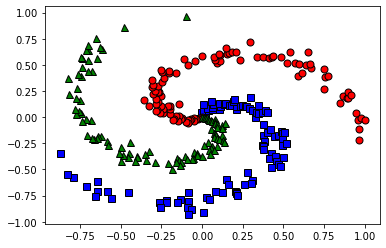

In [11]:
plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7, markeredgecolor = 'k');
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'ro', markersize = 7, markeredgecolor = 'k');
plt.plot(X[2*N:, 0], X[2*N:, 1], 'g^', markersize = 7, markeredgecolor = 'k');

# Xây dựng neural network
Rõ ràng dữ liệu trên không có dạng tuyến tính, điều này khiến cho hàm softmax không thể làm việc.

Ta sẽ sử dụng multilayer neural network với hiddent layer sử dụng ReLU làm hàm kích hoạt và output layer là một hàm softmax regression.

In [19]:
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 1, keepdims = True))
    A   = e_Z/e_Z.sum(axis =1, keepdims = True)
    return A

def crossentropy_loss(Yhat, y):
    id0 = range(Yhat.shape[0])
    return -np.mean(np.log(Yhat[id0,y]))

def mlp_init(d0, d1, d2):
    """
    d0 : dimension of input data
    d1 : number of hiddent unit
    d2 : number of ouput unit = number of classes
    """
    W1 = 0.01*np.random.randn(d0,d1)
    b1 = np.zeros(d1)
    W2 = 0.01*np.random.randn(d1,d2)
    b2 = np.zeros(d2)
    return (W1, b1, W2, b2)

def mlp_predict(X, W1, b1, W2, b2):
    """
    X: data matrix, W,b: weight matrix, bias
    """
    Z1 = X.dot(W1) + b1   # shape (N,d1)
    A1 = np.maximum(Z1,0) # shape (N,d1)
    Z2 = A1.dot(W2) + b2  # shape (N,d2)
    return np.argmax(Z2, axis = 1)  # return idex max

In [38]:
def mlp_fit(X, y, W1, b1, W2, b2, eta):
    loss_hist = []
    for i in range(20000): # number of epoches
        Z1 = X.dot(W1) + b1 # shape (N,d1)
        A1 = np.maximum(Z1,0) # shape (N,d1)
        Z2 = A1.dot(W2) + b2 # shape (N,d2)
        Yhat = softmax_stable(Z2)
        if i% 1000 == 0:
                loss = crossentropy_loss(Yhat,y)
                print("iter {:d}, loss: {:f}".format(i,loss))
                loss_hist.append(loss)
        # back propagation
        id0 = range(Yhat.shape[0])
        Yhat[id0,y] -= 1
        E2 = Yhat/N
        dW2 = np.dot(A1.T,E2)
        db2 = np.sum(E2, axis = 0)
        E1 = np.dot(E2, W2.T)
        E1[Z1 <= 0] = 0
        dW1 = np.dot(X.T, E1)
        db1 = np.sum(E1, axis = 0)
        
        # gradient descent update
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2
        
    return (W1,b1,W2,b2,loss_hist)

In [52]:
d0 = 2
d1 = h = 100
d2 = C = 3
eta = 1
(W1, b1, W2, b2) = mlp_init(d0,d1,d2)
(W1, b1, W2, b2 ,loss_hist) = mlp_fit(X, y, W1 ,b1, W2 ,b2 ,eta)
y_pred = mlp_predict(X, W1, b1, W2, b2)
acc = 100*np.mean(y_pred == y)
print("Training accuracy: {:.2f} %".format(acc))


iter 0, loss: 1.098785
iter 1000, loss: 0.032288
iter 2000, loss: 0.025035
iter 3000, loss: 0.021948
iter 4000, loss: 0.019659
iter 5000, loss: 0.018486
iter 6000, loss: 0.016704
iter 7000, loss: 0.017008
iter 8000, loss: 0.016692
iter 9000, loss: 0.015904
iter 10000, loss: 0.015454
iter 11000, loss: 0.015181
iter 12000, loss: 0.015050
iter 13000, loss: 0.014103
iter 14000, loss: 0.014313
iter 15000, loss: 0.014731
iter 16000, loss: 0.013924
iter 17000, loss: 0.014217
iter 18000, loss: 0.013821
iter 19000, loss: 0.013516
Training accuracy: 99.33 %


In [56]:
print(W1.shape)
print(W2.shape)

(2, 100)
(100, 3)
